In [1]:
# Importing all Required libraries
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,5)
import matplotlib.pyplot as plt 
import matplotlib.dates as md
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [2]:
%matplotlib inline

In [3]:
# Importing Dataset 
datapath = 'C:/Users/Akhil/Documents/Python Project/Capstone'
df=pd.read_csv(datapath + r'/Training_Data.csv',index_col='Id')
df_cities_tier=pd.read_csv(datapath + r'/Cities_Tier.csv')

In [4]:
# Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [5]:
# Displayin first 5 rows of dataset
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
# Statistical description of Dataset
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


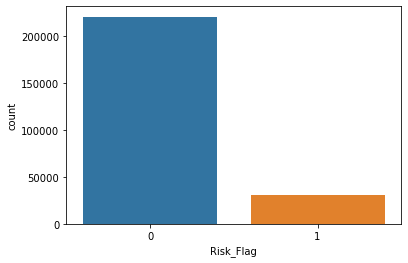

In [7]:
sns.countplot(x="Risk_Flag",data=df)
plt.show()

# Box Plot

In [8]:
# Data prep. for box plot
df_box=df.drop(['Income','Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE'],axis=1)
df_box
# Creatin Labels
xticklist=df_box.columns.to_list()
xticklist

['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']

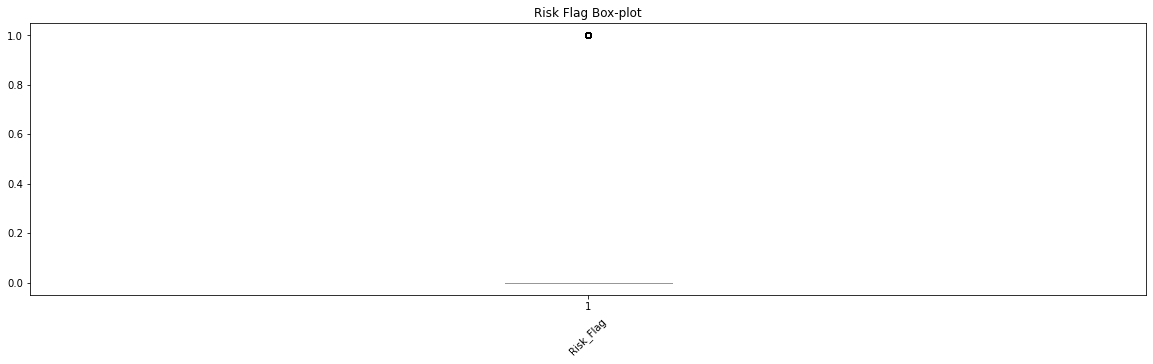

In [9]:
# Box plot for Risk Flag
mpl.rcParams['figure.figsize'] = (20,5)
fig,ax=plt.subplots()
ax.boxplot(df["Risk_Flag"])
ax.set_xlabel('Risk_Flag', rotation = 45)
plt.title('Risk Flag Box-plot')
plt.show()

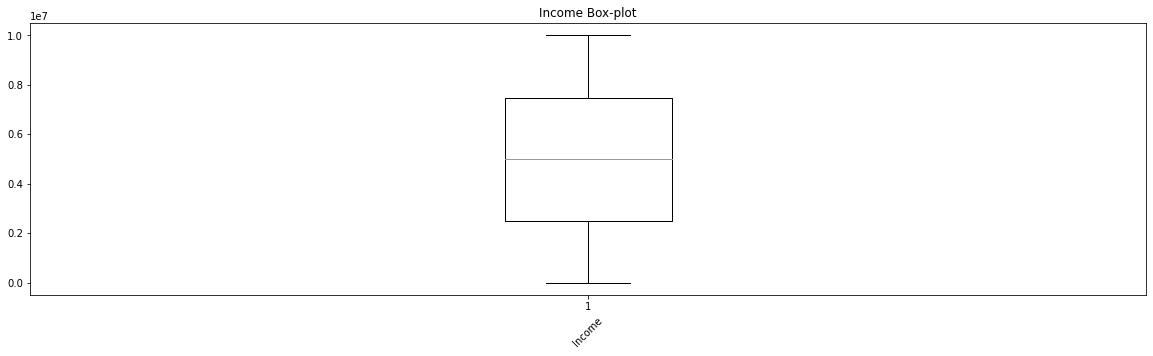

In [10]:
# Box plot for Income
fig,ax=plt.subplots()
ax.boxplot(df["Income"])
ax.set_xlabel('Income', rotation = 45)
plt.title('Income Box-plot')
plt.show()

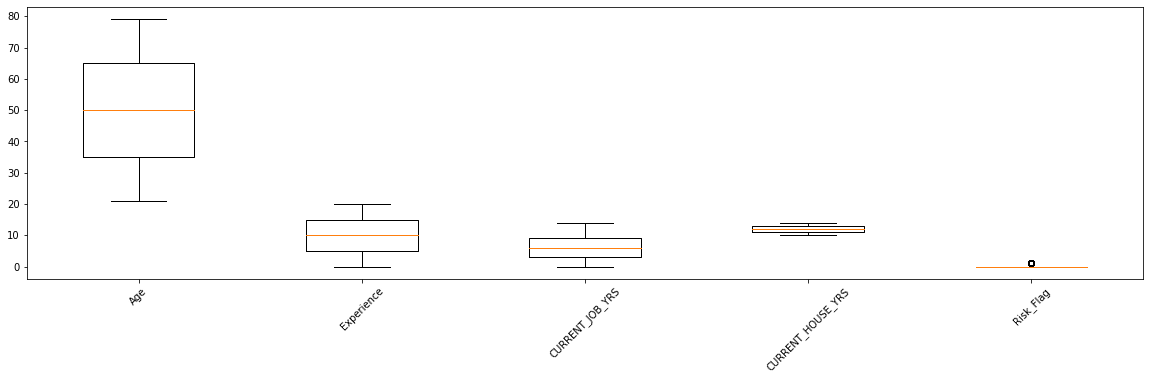

In [11]:
# Creating Box Plots
mpl.rcParams['figure.figsize'] = (20,5)
fig,ax=plt.subplots()
ax.boxplot(df_box)
ax.set_xticklabels(xticklist, rotation = 45)
plt.show()

# Relation of Experiance and income

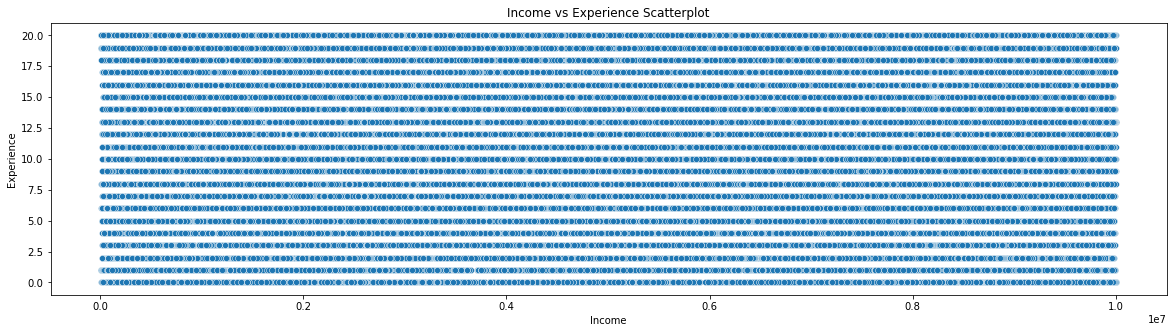

In [12]:
# Scatterplot of Experience vs Income
fig, plt.subplots()
sns.scatterplot(x="Income",y="Experience",data=df)
plt.title('Income vs Experience Scatterplot')
plt.show()

We are not able to identify any relation in Experience and Income from above scatterplot.

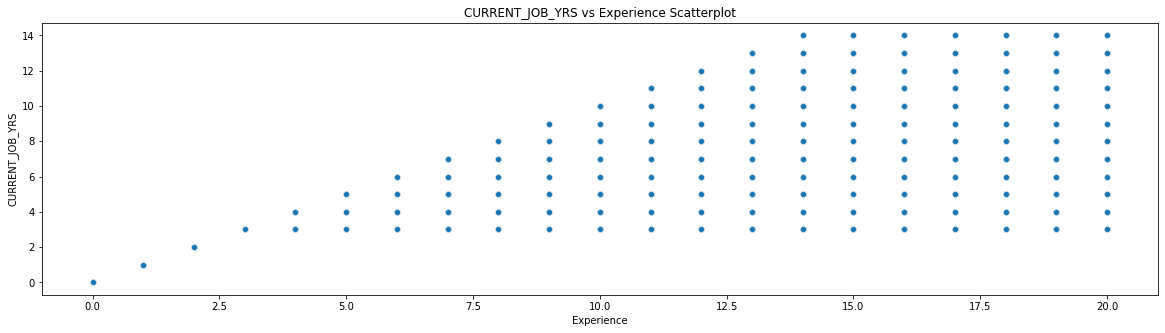

In [13]:
sns.scatterplot(y="CURRENT_JOB_YRS",x="Experience",data=df)
plt.title('CURRENT_JOB_YRS vs Experience Scatterplot')
plt.show()

From the above plot we can say that for individuals with current job years of <= 2 years have less than 2 years of experience.
After that for Current job years >2 their is high variability.

In [14]:
np.corrcoef(df["Income"],df["Experience"])

array([[1.        , 0.00642164],
       [0.00642164, 1.        ]])

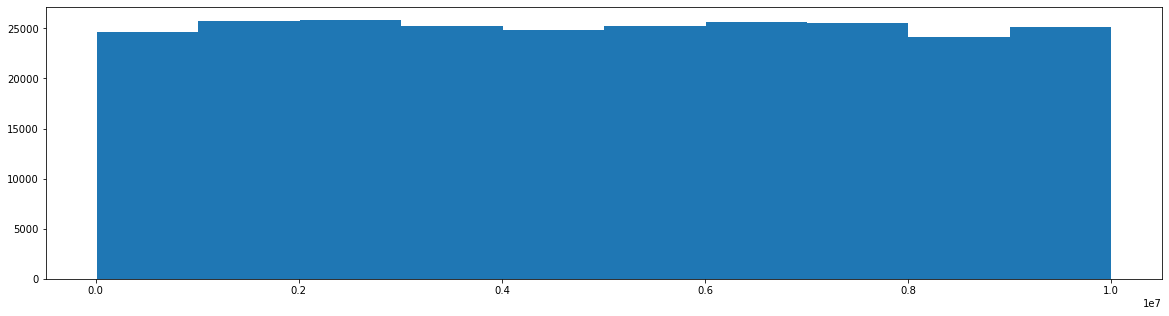

In [15]:
# Distribution of Income
fig, ax = plt.subplots()
ax.hist(df["Income"],bins=10)
plt.show()

Text(0.5, 1.0, 'Box plot of Income for each City')

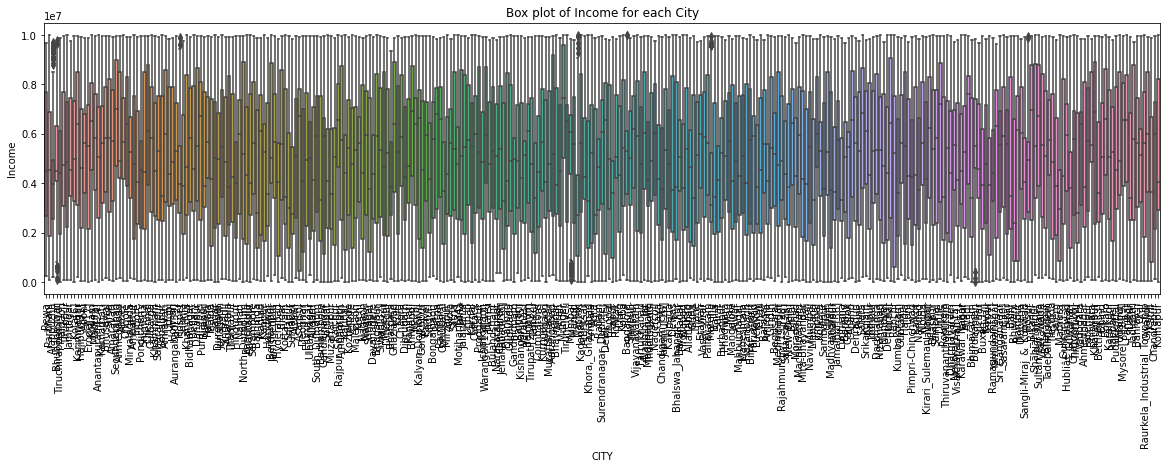

In [16]:
# Box plot of Income for each City
plt.xticks(rotation="90")
sns.boxplot(x=df["CITY"],y=df["Income"],data=df)
plt.title('Box plot of Income for each City')

Text(0.5, 1.0, 'Box plot of Income for each State')

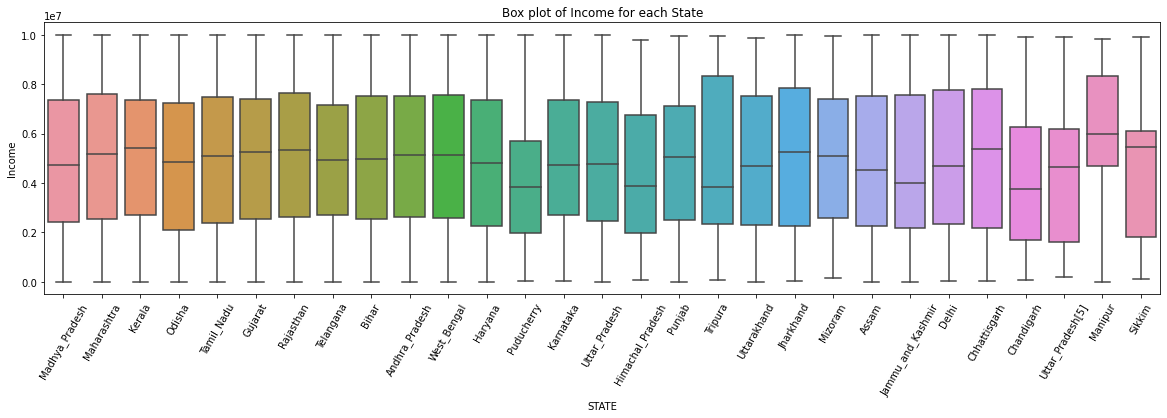

In [17]:
# Box plot of Income for each State
plt.xticks(rotation="60")
sns.boxplot(x=df["STATE"],y=df["Income"],data=df)
plt.title('Box plot of Income for each State')

Manipur has the highest median Income as well as the 75% of the distripution of Manipur is above median Income of Country.
Punucherry, Himachal Pradesh, Tripura, Jammu & Kashmir and Chandigarh have the lowest median Income.

In [18]:
print('Median Income of India : '+ str(df["Income"].median()))

Median Income of India : 5000694.5


Text(0.5, 1.0, 'Box plot of Income vs Experience')

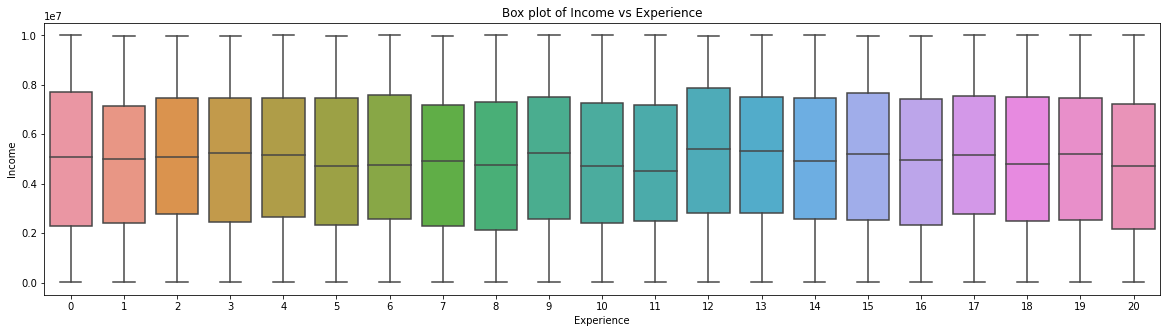

In [19]:
# Box plot of Income vs Experience
sns.boxplot(x=df["Experience"],y=df["Income"],data=df)
plt.title('Box plot of Income vs Experience')

Text(0.5, 1.0, 'Box plot of Income vs Age')

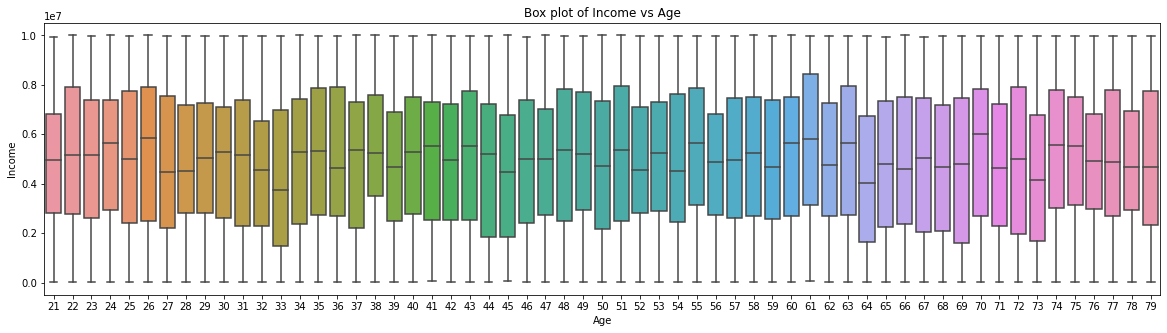

In [20]:
# Box plot of Income vs Age
sns.boxplot(x=df["Age"],y=df["Income"],data=df)
plt.title('Box plot of Income vs Age')

Text(0.5, 1.0, 'Box plot of Age vs Experience')

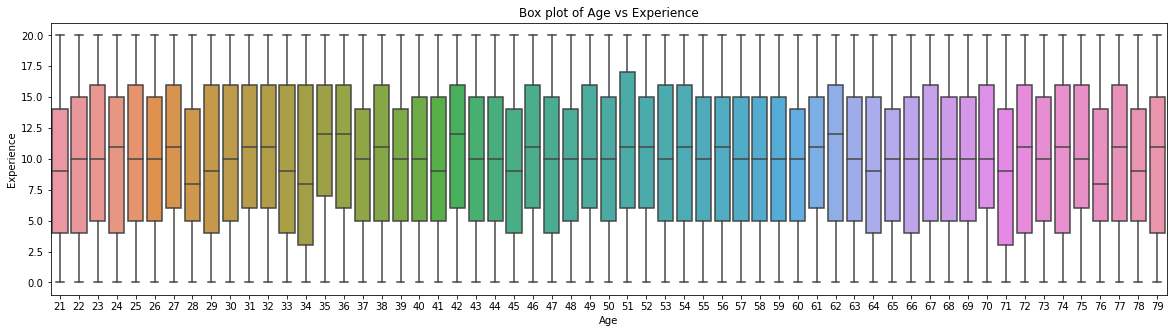

In [21]:
# Box plot of Age vs Experience
sns.boxplot(x=df["Age"],y=df["Experience"],data=df)
plt.title('Box plot of Age vs Experience')

Text(0.5, 1.0, 'Box plot of Income vs Profession')

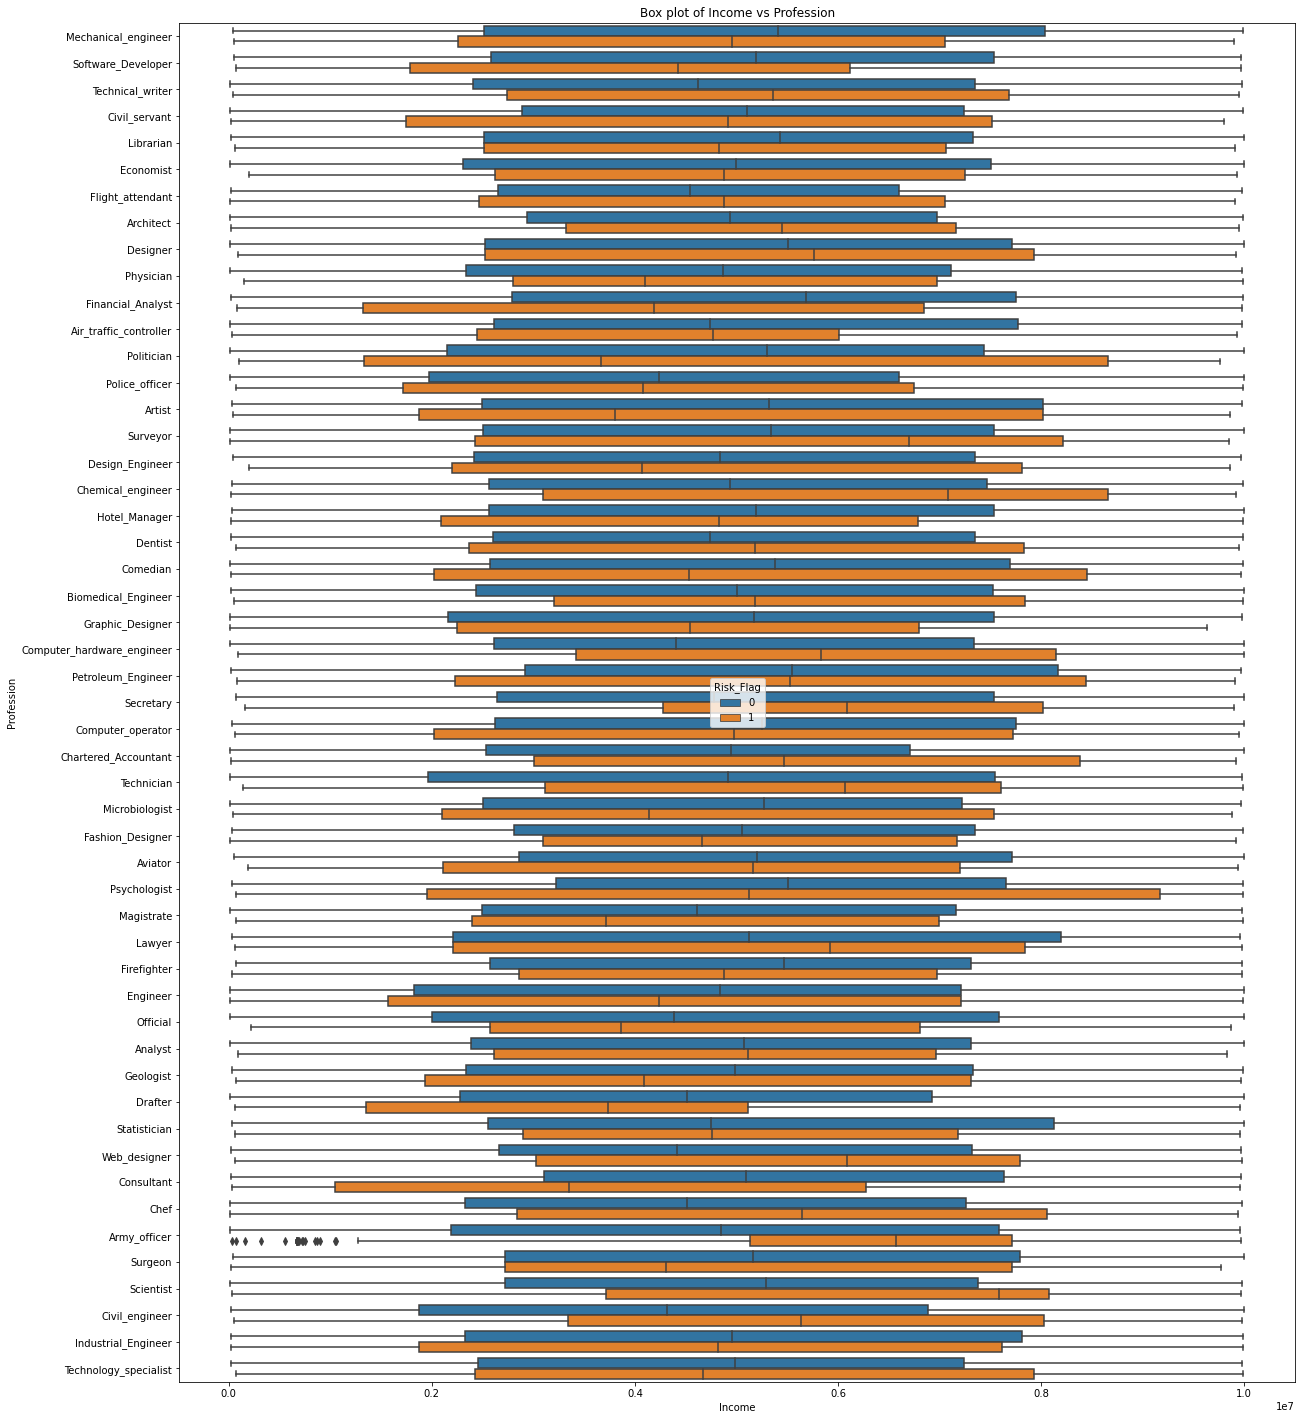

In [22]:
# Box plot of Income vs Profession
mpl.rcParams['figure.figsize'] = (20,25)
sns.boxplot(y=df["Profession"],x=df["Income"],data=df,hue="Risk_Flag")
plt.title('Box plot of Income vs Profession')

Text(0.5, 1.0, 'Box plot of Income vs Profession')

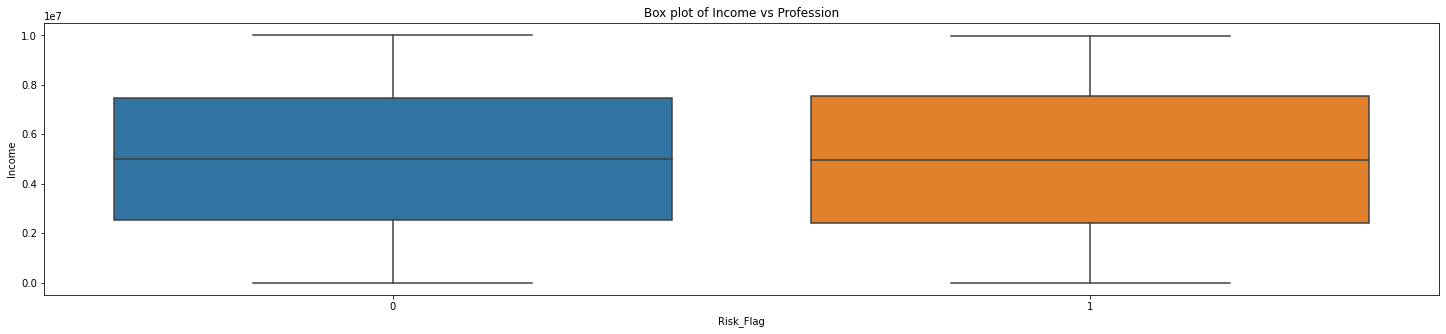

In [23]:
mpl.rcParams['figure.figsize'] = (25,5)
sns.boxplot(x=df["Risk_Flag"],data=df,y=df["Income"])
plt.title('Box plot of Income vs Profession')

In [24]:
df.groupby(['Risk_Flag'],as_index=False)[['Income']].quantile([0.05,0.1,0.2,.9,.95])

Risk_Flag      Income
0 0.05          0   510754.00
  0.10          0  1044096.00
  0.20          0  2036508.00
  0.90          0  8996641.00
  0.95          0  9508705.00
1 0.05          1   431968.75
  0.10          1   927040.00
  0.20          1  1885923.00
  0.90          1  9038552.00
  0.95          1  9475430.00

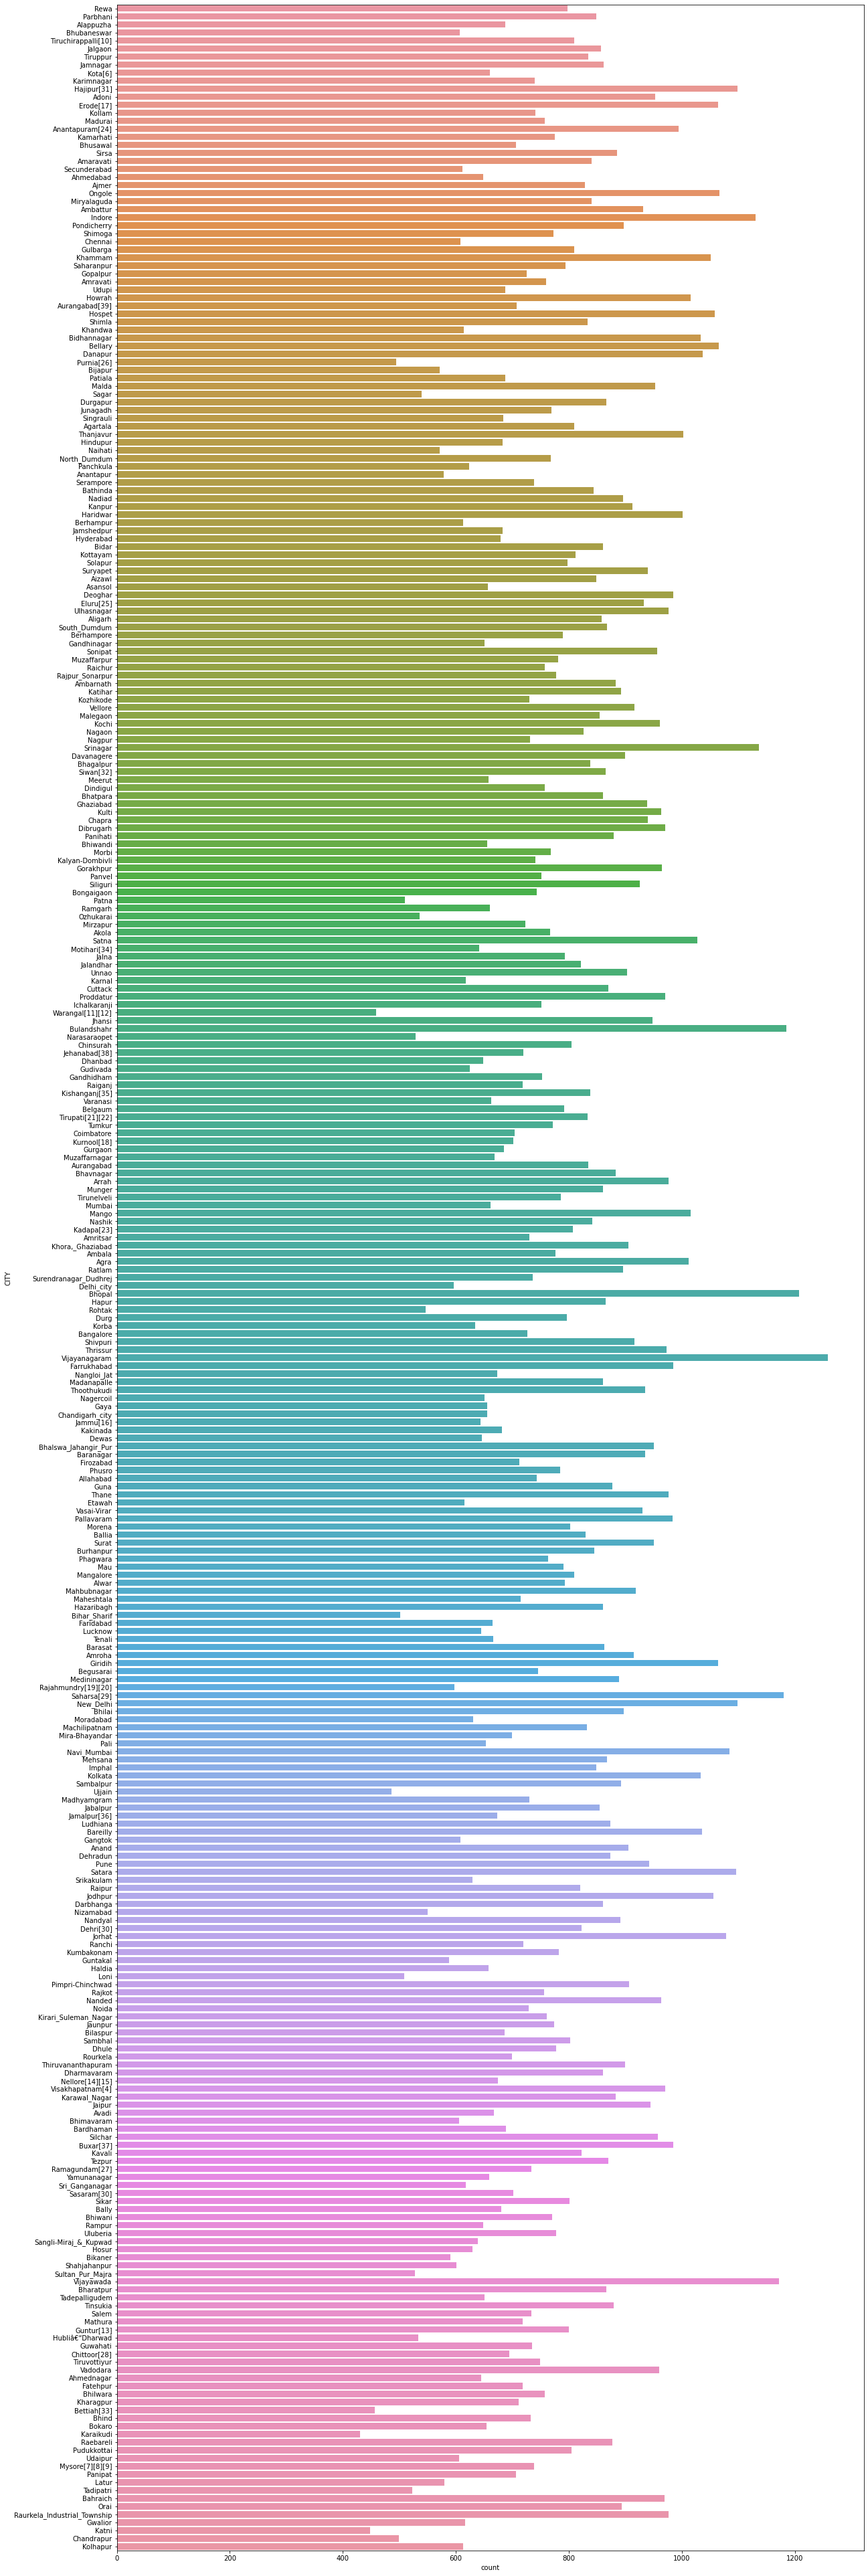

In [25]:
mpl.rcParams['figure.figsize'] = (20,70)
sns.countplot(y="CITY",data=df)
plt.show()

<AxesSubplot:xlabel='House_Ownership', ylabel='Income'>

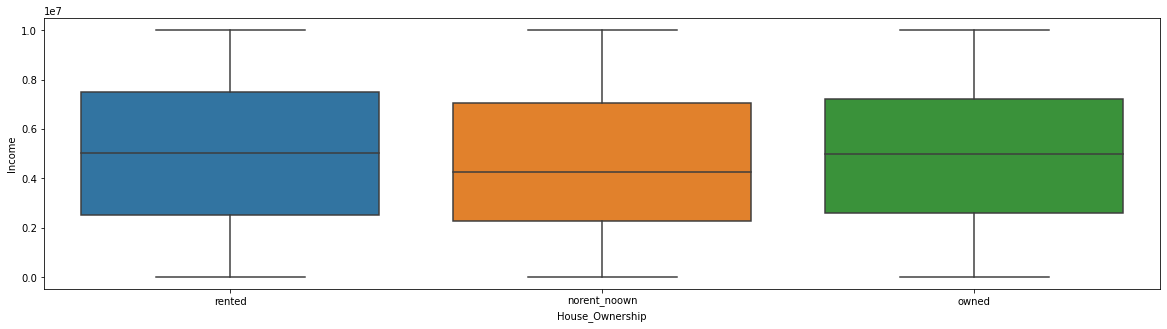

In [26]:
mpl.rcParams['figure.figsize'] = (20,5)
sns.boxplot(x=df["House_Ownership"],y=df["Income"],data=df)

<AxesSubplot:xlabel='Car_Ownership', ylabel='Income'>

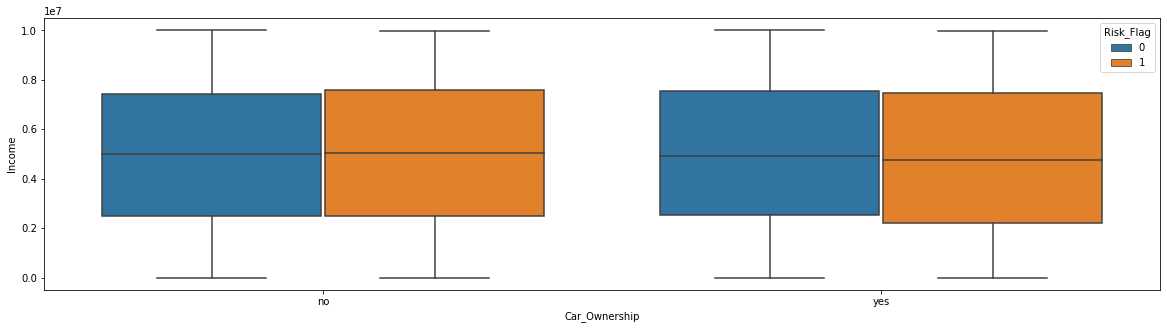

In [27]:
sns.boxplot(x=df["Car_Ownership"],y=df["Income"],data=df,hue='Risk_Flag')

In [28]:
df["Income"]=df["Income"].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Income             252000 non-null  float64
 1   Age                252000 non-null  int64  
 2   Experience         252000 non-null  int64  
 3   Married/Single     252000 non-null  object 
 4   House_Ownership    252000 non-null  object 
 5   Car_Ownership      252000 non-null  object 
 6   Profession         252000 non-null  object 
 7   CITY               252000 non-null  object 
 8   STATE              252000 non-null  object 
 9   CURRENT_JOB_YRS    252000 non-null  int64  
 10  CURRENT_HOUSE_YRS  252000 non-null  int64  
 11  Risk_Flag          252000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 33.1+ MB


<AxesSubplot:xlabel='Car_Ownership', ylabel='Income'>

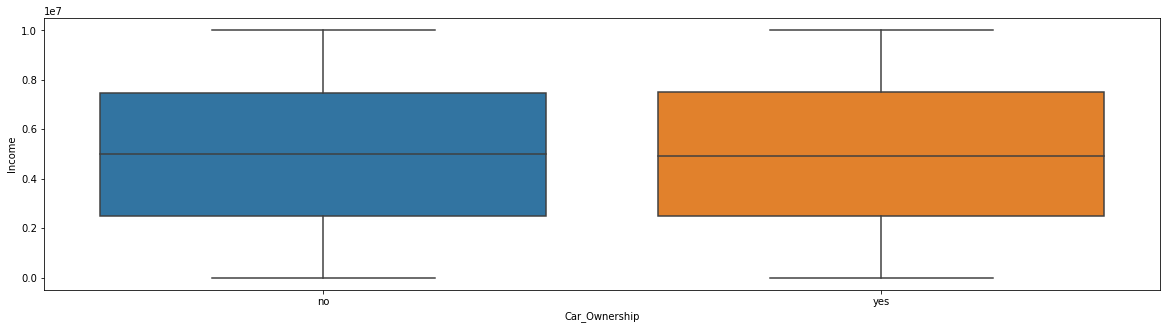

In [29]:
sns.boxplot(x=df["Car_Ownership"],y=df["Income"],data=df)

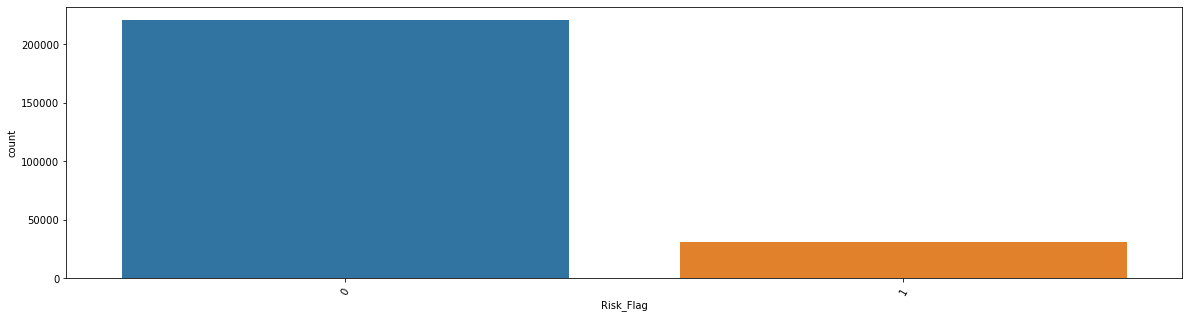

In [30]:
# plt.figure(figsize=(10,5))
plt.xticks(rotation="60")
sns.countplot(x="Risk_Flag", data=df)
plt.show()

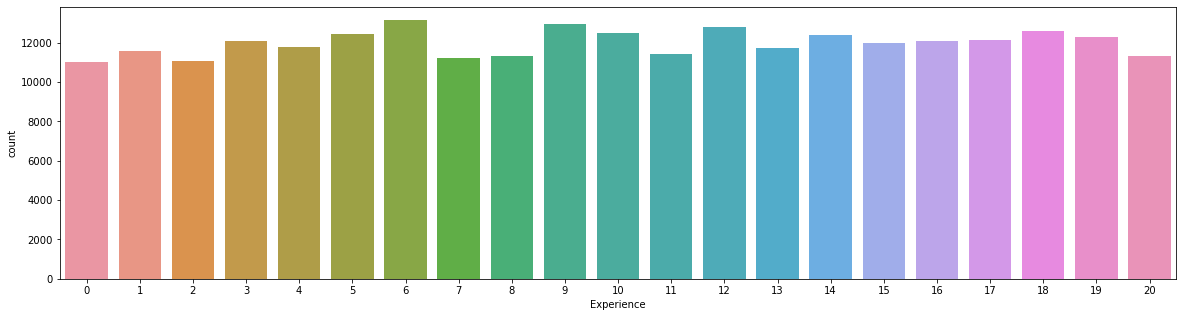

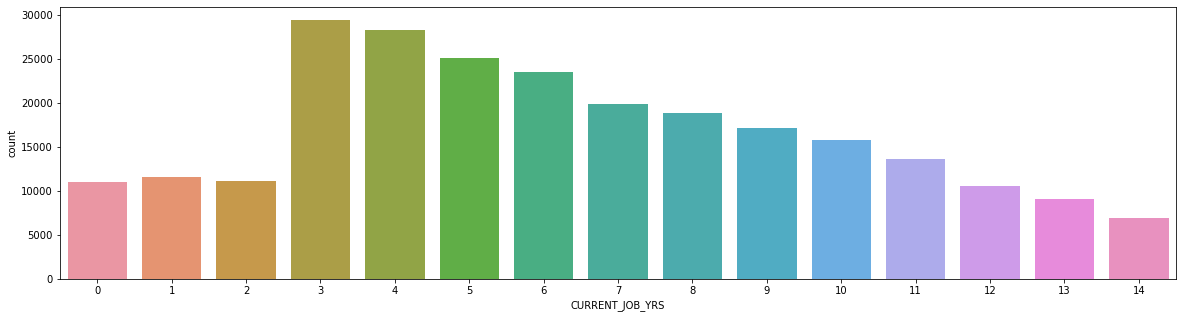

In [31]:

sns.countplot(x="Experience",data=df)
plt.show()


sns.countplot(x="CURRENT_JOB_YRS",data=df)
plt.show()

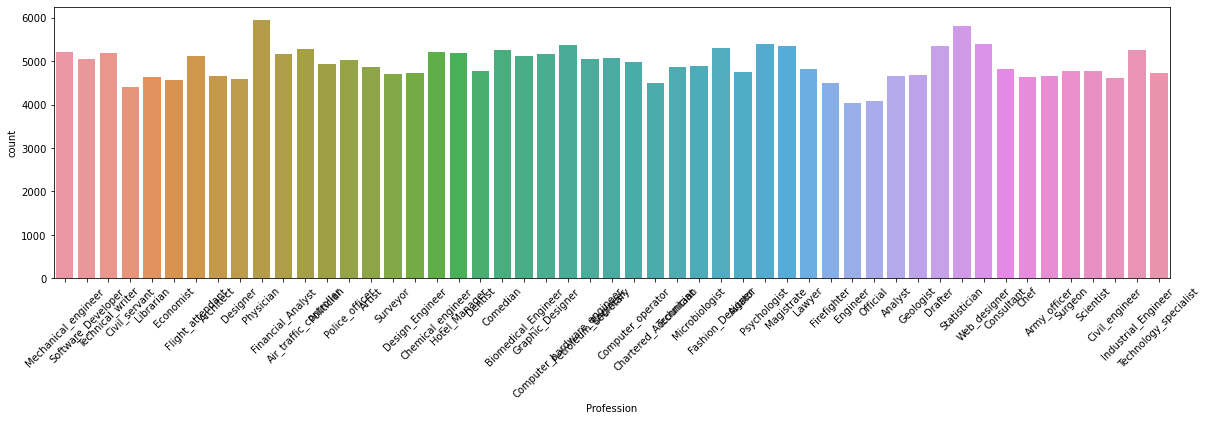

In [32]:

sns.countplot(x="Profession",data=df)
plt.xticks(rotation='45')
plt.show()

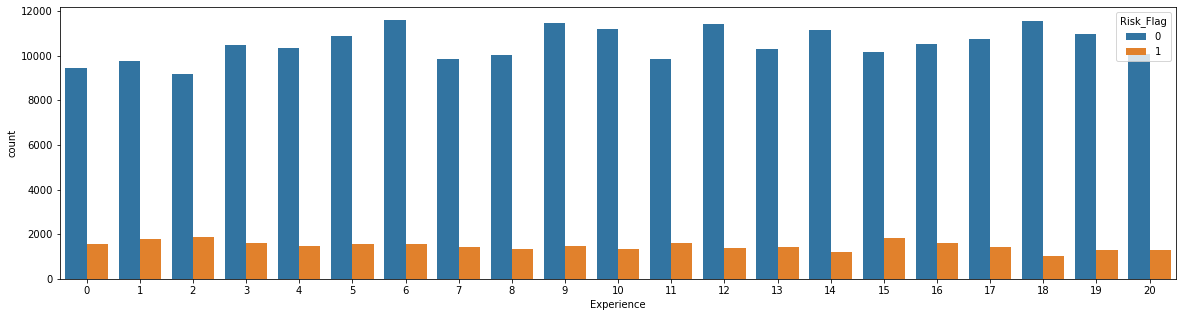

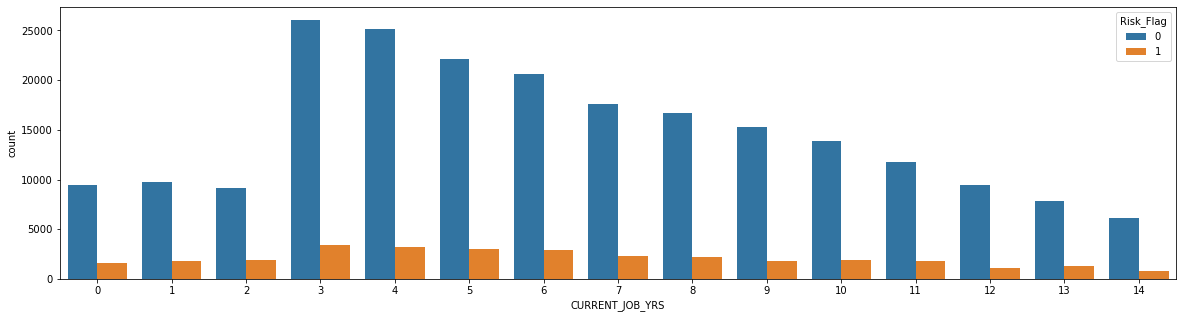

In [33]:

sns.countplot(x="Experience",data=df,hue="Risk_Flag")
plt.show()


sns.countplot(x="CURRENT_JOB_YRS",data=df,hue="Risk_Flag")
plt.show()

There is a continous decline in No. of Years in current job after 3 years.
It indicates that after 3 years more no. of individuals switch jobs.
There is a increase in no. of Defaults after 3 years in current Job and it starts declining with coming years in the same job.

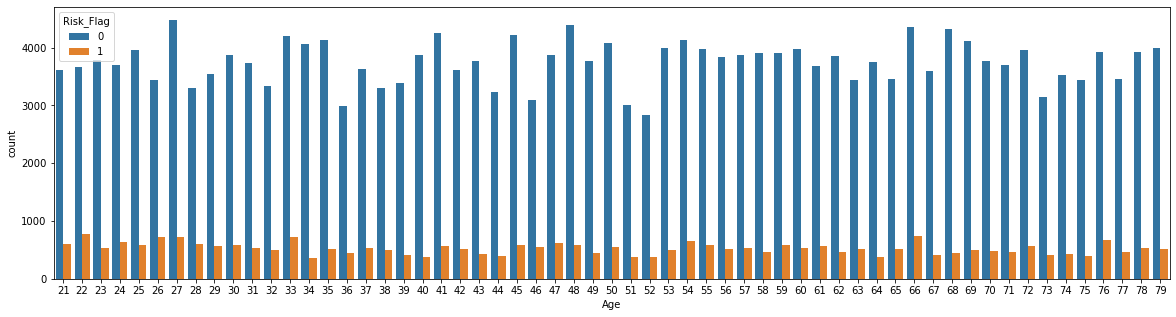

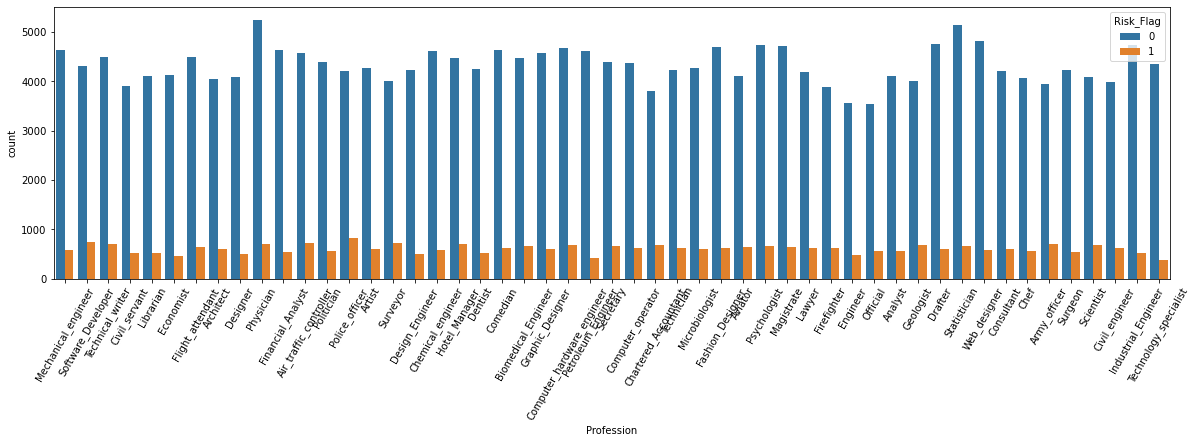

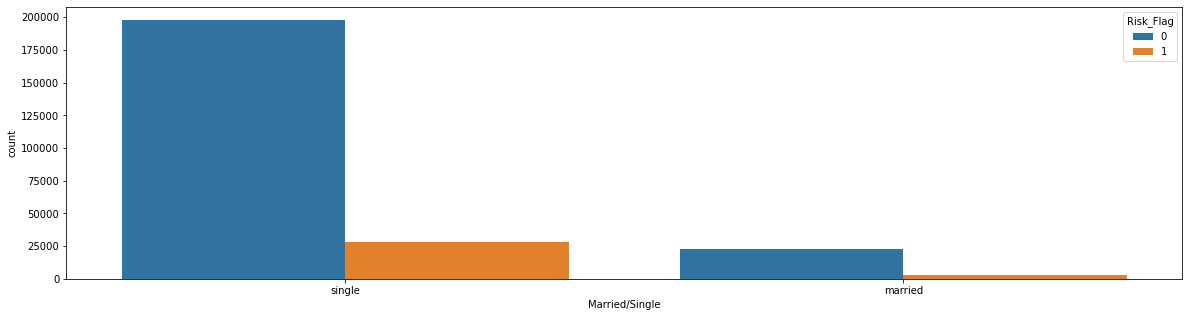

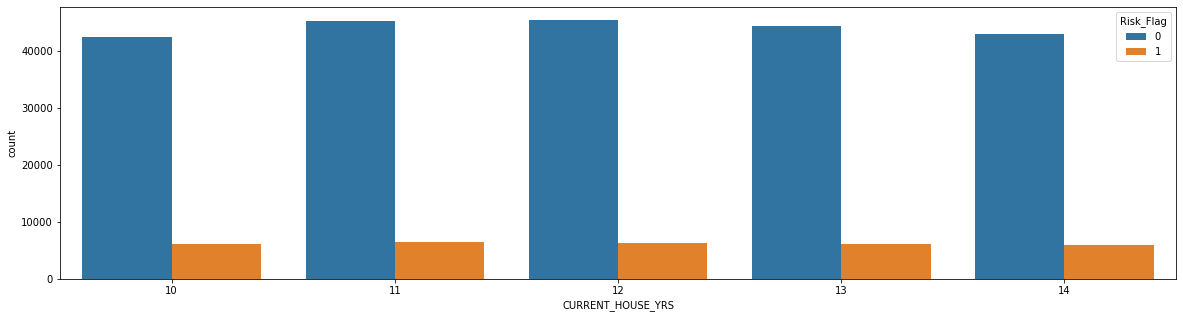

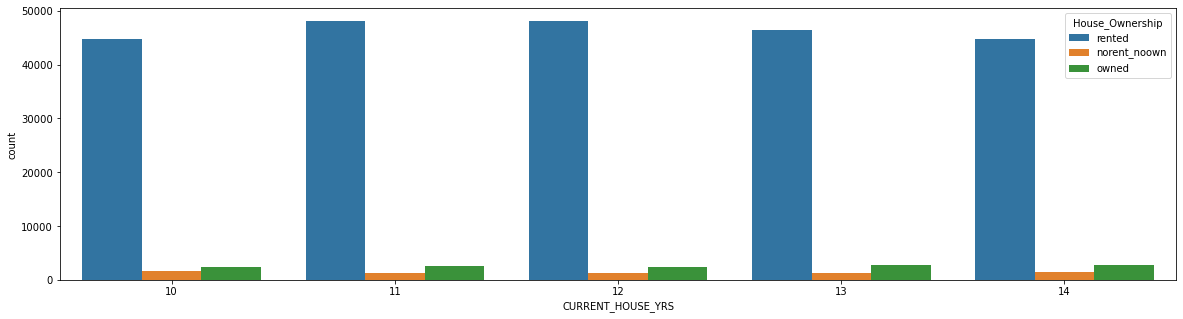

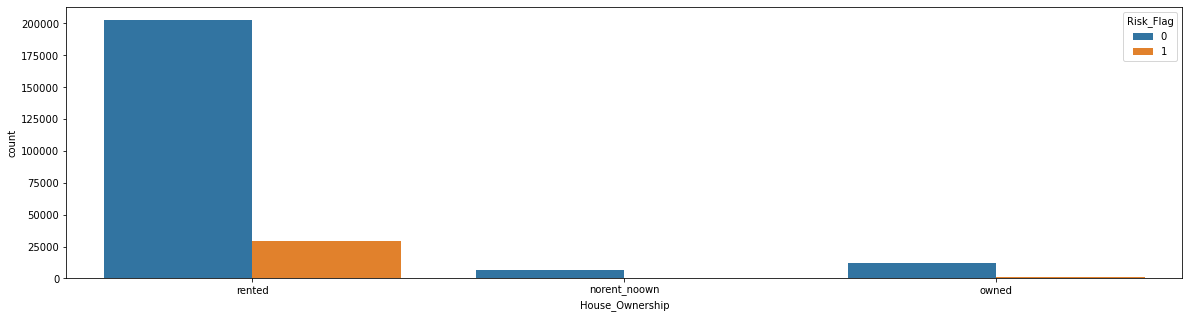

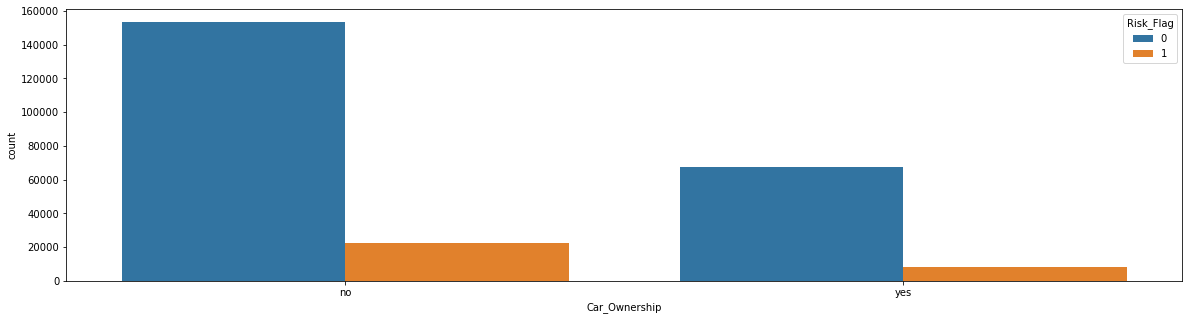

In [34]:

sns.countplot(x="Age",data=df,hue="Risk_Flag")
plt.show()


sns.countplot(x="Profession",data=df,hue="Risk_Flag")
plt.xticks(rotation='60')
plt.show()

sns.countplot(x="Married/Single",data=df,hue="Risk_Flag")
plt.show()


sns.countplot(x="CURRENT_HOUSE_YRS",data=df,hue="Risk_Flag")
plt.show()

sns.countplot(x="CURRENT_HOUSE_YRS",data=df,hue="House_Ownership")
plt.show()

sns.countplot(x="House_Ownership",data=df,hue="Risk_Flag")
plt.show()

sns.countplot(x="Car_Ownership",data=df,hue="Risk_Flag")
plt.show()



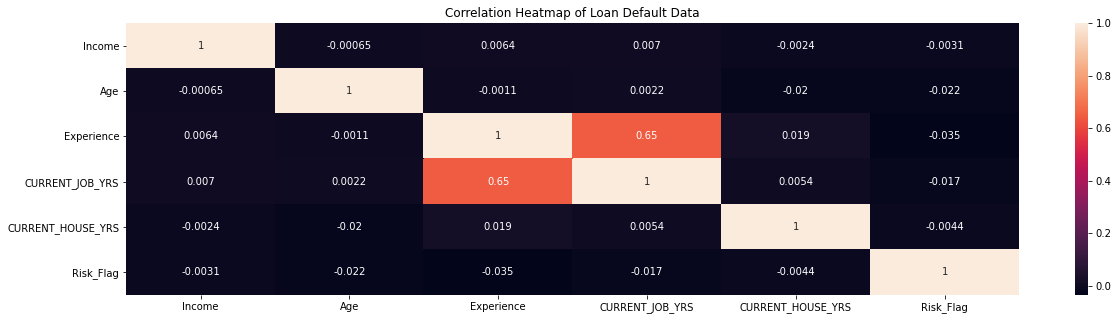

In [35]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap of Loan Default Data')
  
# displaying heatmap
plt.show()

Current Job Years and Experience are highly correlated.

In [36]:
# Count no of Unique values
No_of_cities = df.CITY.nunique()
No_of_States = df.STATE.nunique()
Distinct_Professions = df.Profession.nunique()
Types_of_Car_ownership = df.Car_Ownership.nunique()
Types_of_House_ownership = df.House_Ownership.nunique()

print('No. of Cities : '+ str(No_of_cities))
print('No. of States : '+ str(No_of_States))
print('Distinct Profession : '+ str(Distinct_Professions))
print('Types of Car Ownership : '+ str(Types_of_Car_ownership))
print('Types of House Ownership : '+ str(Types_of_House_ownership))

No. of Cities : 317
No. of States : 29
Distinct Profession : 51
Types of Car Ownership : 2
Types of House Ownership : 3


In [37]:
# City has 317 Distinct value so will we drop it
df_le = df.drop(['CITY'],axis=1)

In [38]:
# Label Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
# Accommodate data into dataVariables
data = df_le

# Encode the object data to type int
for e in data.columns:
    if data[e].dtype == 'object':
        labelEncoder.fit(list(data[e].values))
        data[e] = labelEncoder.transform(data[e].values)
        
        # Accommodate the data that has been changed
        df_le = data

In [39]:
# Dateset after label encoding
df_le.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,
1,1303834.0,23,3,1,2,0,33,13,3,13,0
2,7574516.0,40,10,1,2,0,43,14,9,13,0
3,3991815.0,66,4,0,2,0,47,12,4,10,0
4,6256451.0,41,2,1,2,1,43,17,2,12,1
5,5768871.0,47,11,1,2,0,11,22,3,14,1


In [48]:
# model setup without city
X = df_le.drop(['Risk_Flag'],axis=1)
Y = df_le['Risk_Flag']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train,Y_train)
pred = forest_model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [51]:
print(accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(precision_score(Y_test, pred))
print(recall_score(Y_test, pred))

0.8998412698412699
[[42074  2190]
 [ 2858  3278]]
0.5994879297732261
0.5342242503259452


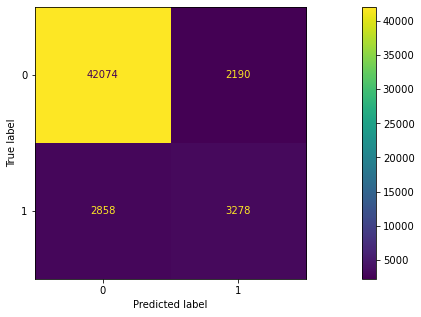

In [52]:
plot_confusion_matrix(forest_model,
                      X_test,
                      Y_test)

# Logistic Regression

In [53]:
# Train the model on the training set using LogisticRegression
from sklearn.linear_model import LogisticRegression

model=LogisticRegression().fit(X_train, Y_train)
pred=model.predict(X_test)

In [54]:
print(accuracy_score(Y_test, pred))
print(precision_score(Y_test, pred))
print(recall_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))

0.8782539682539683
0.0
0.0
[[44264     0]
 [ 6136     0]]


C:\Users\Akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


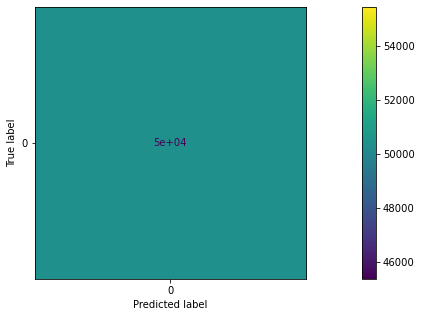

In [55]:
plot_confusion_matrix(model,X_test,pred)

# Using Smote

In [56]:
# pip install imblearn

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [58]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train,Y_train)

In [59]:
from collections import Counter
print("Before SMOTE :" , Counter(Y_train))
print("After SMOTE :" , Counter(Y_train_smote))

Before SMOTE : Counter({0: 176740, 1: 24860})
After SMOTE : Counter({0: 176740, 1: 176740})


# Random forest with Smote

In [79]:
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train_smote,Y_train_smote)
pred = forest_model.predict(X_test)

0.8715674603174604
[[38774  5490]
 [  983  5153]]
0.4841679977449967
0.8397979139504563


Text(0.5, 1.0, 'Confusion Matrix for Random forest with Smote')

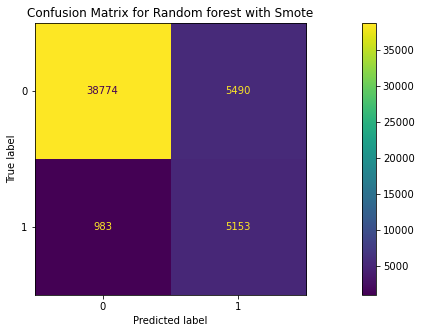

In [84]:
print(accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(precision_score(Y_test, pred))
print(recall_score(Y_test, pred))
plot_confusion_matrix(forest_model,X_test,Y_test)
plt.title('Confusion Matrix for Random forest with Smote')

In [63]:
model=LogisticRegression().fit(X_train_smote, Y_train_smote)
pred=model.predict(X_test)

In [64]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
print(accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(precision_score(Y_test, pred))
print(recall_score(Y_test, pred))

0.8782539682539683
[[44264     0]
 [ 6136     0]]
0.0
0.0


C:\Users\Akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


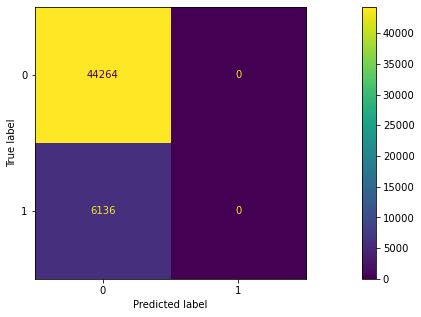

In [66]:
plot_confusion_matrix(model,
                      X_test,
                      Y_test)

# XG-Boast with Smote

In [67]:
# conda install -c conda-forge xgboost

In [68]:
import xgboost as xgb

In [69]:
model = xgb.XGBClassifier(objective='binary:logistic')
model.fit(X_train_smote,
            Y_train_smote)
print(model)

C:\Users\Akhil\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:59:29] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [70]:
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]

In [71]:
print('Accuracy : ' ,accuracy_score(Y_test,predictions))
print( 'Confusion Matrix : ' ,confusion_matrix(Y_test, predictions))
print('Precision score' ,precision_score(Y_test, predictions))
print('Recall score' ,recall_score(Y_test, predictions))

Accuracy :  0.8369841269841269
Confusion Matrix :  [[37251  7013]
 [ 1203  4933]]
Precision score 0.41294157040013396
Recall score 0.8039439374185137


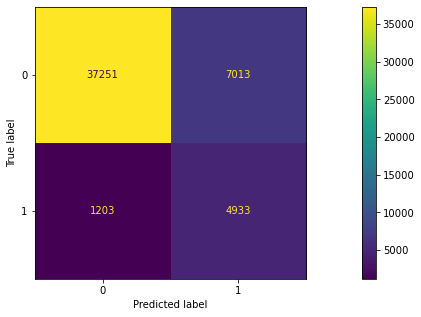

In [72]:
plot_confusion_matrix(model,
                      X_test,
                      Y_test)

# XG-Boost without smote

In [74]:
model = xgb.XGBClassifier(objective='binary:logistic')
model.fit(X_train,
            Y_train)
print(model)

C:\Users\Akhil\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:01:50] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [75]:
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]

In [76]:
print('Accuracy : ' ,accuracy_score(Y_test,predictions))
print( 'Confusion Matrix : ' ,confusion_matrix(Y_test, predictions))
print('Precision score' ,precision_score(Y_test, predictions))
print('Recall score' ,recall_score(Y_test, predictions))

Accuracy :  0.8873412698412698
Confusion Matrix :  [[43696   568]
 [ 5110  1026]]
Precision score 0.64366373902133
Recall score 0.16720990873533245


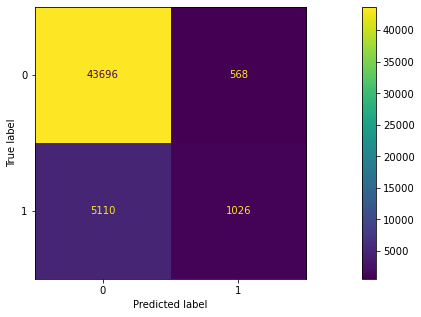

In [77]:
plot_confusion_matrix(model,
                      X_test,
                      Y_test)